<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_08_Nov_(Norm%2C_chi2%2C_exp_y_Cox_Ingersoll_Ross).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

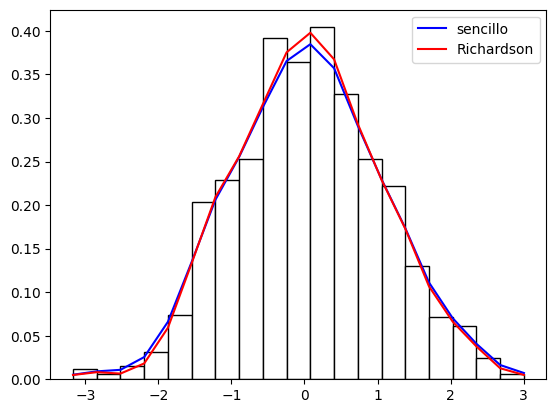

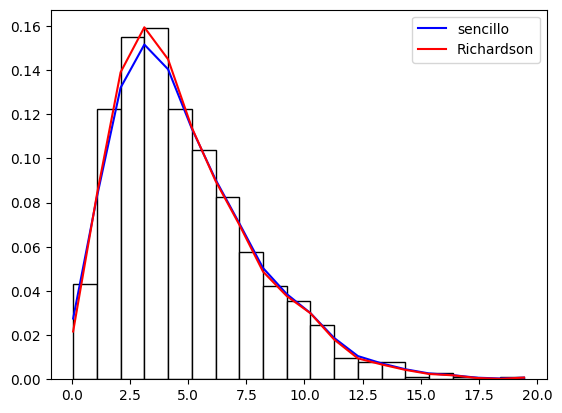

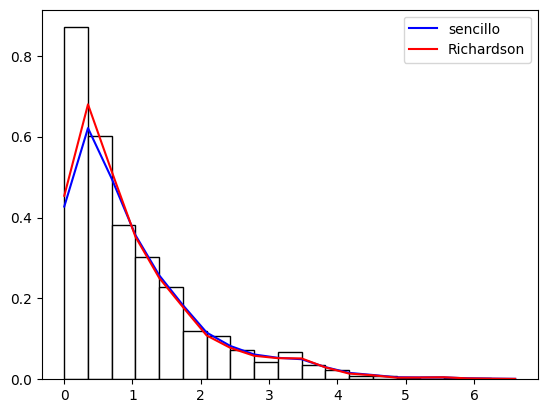

In [8]:
from scipy.stats import norm, kstest, gaussian_kde, chi2, expon
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import random, gauss, seed
from math import log, exp, sqrt, pi
import numpy as np
from random import random
from time import time
from numba import jit
# < > ∈ o ∉ | λ

@jit(nopython=True)
def K(x):
  return (1/sqrt(2*pi))*exp(-x**2/2)

@jit(nopython=True)
def pdf(z,h,l):
  m=len(l)
  suma=0
  for i in range(m):
    suma=suma+K((z-l[i])/h)
  return suma/(m*h)

def serie_0(n):
  return norm.rvs(0,1,n)

def serie_1(n):
  return chi2.rvs(5,0,1,n)

def serie_2(n):
  return expon.rvs(0,1,n)

n=1000
for serie in [serie_0, serie_1, serie_2]:
  l=serie(n)
  o=np.std(l)
  h=1.06*o/(n**0.2)
  m=min(l)
  M=max(l)
  b=[]
  x=m
  while x<M:
    b.append(x)
    x=x+(M-m)/20
  le=[]
  le1=[]
  for z in b:
    p1=pdf(z,h,l)
    h1=2*h
    p2=pdf(z,h1,l)
    le.append(p1)
    le1.append((4*p1-p2)/3)
  plt.hist(l, density=1, bins=b, color="white", edgecolor="black")
  plt.plot(b, le, color="blue", label="sencillo")
  plt.plot(b, le1, color="red", label="Richardson")
  plt.legend()
  plt.show()

Modelo: Cox-Ingerson-Ross

mu=11

sigma=0.03

c=-0.2

delta_T=0.01

z0=10.8

ns=10000

Graficar fxT en T = [0.1, 1, 2, 2.5, 3, 3.5, 4]

In [17]:
# Cox Ingersoll Ross Milstrein datos reales BIEN
from scipy.stats import kstest, gaussian_kde, chi2
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import random, gauss, seed
from math import log, exp, sqrt, pi
import numpy as np
from time import time
from numba import jit

@jit(nopython=True)
def F(z,u,o,c):
  return c*(z-u)

@jit(nopython=True)
def G(z,u,o,c):
  return o*sqrt(z)

@jit(nopython=True)
def Gp(z,u,o,c):
  return o/(2*sqrt(z))

@jit(nopython=True)
def K(x):
  return (1/sqrt(2*pi))*exp(-x**2/2)

@jit(nopython=True)
def pdf(z,h,l):
  m=len(l)
  suma=0
  for i in range(m):
    suma=suma+K((z-l[i])/h)
  return suma/(m*h)

@jit(nopython=True)
def f(z0, x, delta, ns):
  seed(178341)
  oo=sqrt(delta)
  u=x[0]
  o=x[1]
  c=x[2]
  l=np.zeros(ns)
  for j in range(ns):
    z=z0
    t=0
    while t<1:
      w=oo*gauss(0,1)
      z=z+ F(z,u,o,c)*delta + G(z,u,o,c)*w + (1/2)*G(z,u,o,c)*Gp(z,u,o,c)*(w**2 - delta)
      t=t + delta
    l[j]=z
  l=np.sort(l)
  o1=np.std(1)
  h=1.06*o1/(ns**0.2)
  ll=[]
  for x in l:
    ll.append(pdf(x,h,l))
  return l,ll

t1=time()
#indi=1 datos reales; indi=0 datos simulados
u0=11
c0=-0.02
delta=0.001
z0=10.8
ms=100000
x=np.array()


plt.figure(figsize=(4,3))
plt.plot(A, ls, color="black", label="Alternative")
plt.plot(A, ls, color="red", label="Bak")
plt.xlabel("a", fontsize=fs)
plt.ylabel("Potencia", fontsize=fs)
plt.xticks(fonssize=fs)
plt.yticks(fonssize=fs)
plt.legend(fonssize=fs)
plt.tight_layout()
plt.savefig("potencia.png", dpi=1200)
plt.show()

print((t2-t1)/60)


ZeroDivisionError: division by zero